# 1. 선 그래프 (Line Graph) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x,y 의 인수는 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 size는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

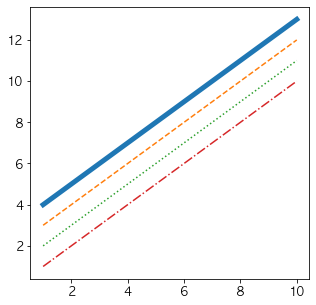

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

x = np.linspace(1, 10, num = 100)
plt.figure(figsize =(5,5))

# x, y 
plt.plot(x, x + 3, linestyle = '-', linewidth = 5) # 선 굵기 지정가능 
plt.plot(x, x + 2, linestyle = '--')
plt.plot(x, x + 1, linestyle = ':')
plt.plot(x, x, linestyle = '-.')
plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')
df.shape

(12, 7)

In [15]:
# 최대농도(㎍/㎥/시) 이름을 변경하자. 조회시 불편하니 
df.rename({df.columns[-1]: '최대농도'}, axis = 1, inplace = True)
df.head()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354


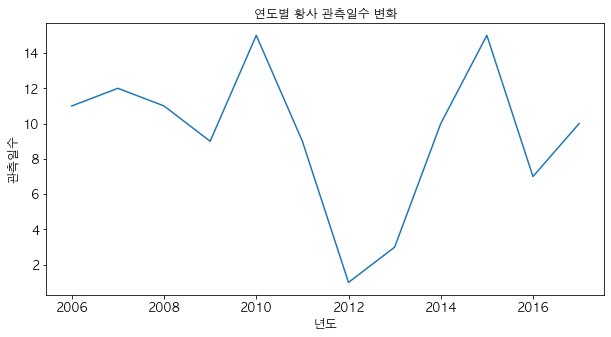

In [19]:
# 년도에 따른 관측일수의 변화흐름을 보고 싶다면? 년도 - 관측일수 연결 
plt.figure(figsize = (10, 5)) # x - 시간, y - 값  # 사이즈에 따라 변동폭 체감이 달라진다. 

# X :  시간- 년도 , Y : 값 - 관측일수
plt.plot(df['년도'], df['관측일수'])

plt.title('연도별 황사 관측일수 변화')
plt.xlabel('년도')
plt.ylabel('관측일수')

plt.show()

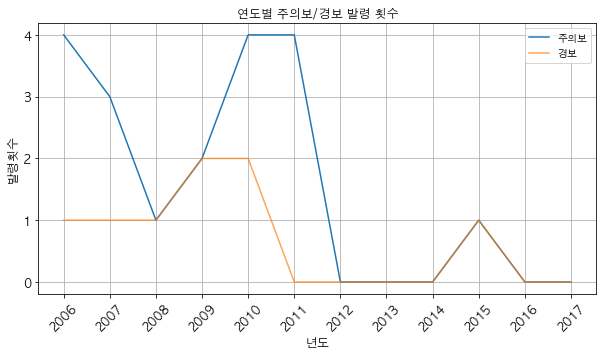

In [30]:
# 년도에 따른 주의보와 경보 발령횟수의 변화 흐름을 한 plt에 그리기 
plt.figure(figsize = (10,5))

plt.plot(df['년도'],df['주의보 발령횟수'], label = '주의보') # 선이 겹쳐서 보이지 않는 부분들이 있다. 
plt.plot(df['년도'],df['경보 발령횟수'], label = '경보', alpha = 0.7) # 투명도를 지정해서 두선이 겹치치 않게 지정한다. 0(투명) - 1(불투명)

plt.title('연도별 주의보/경보 발령 횟수')
plt.xlabel('년도')
plt.ylabel('발령횟수')

#tickss 설정 
plt.xticks(df['년도'], rotation = 45) # 1년단위로 , 45도 비스듬히 써라 
plt.yticks(range(0,5)) #  [0, 1, 2, 3, 4]

plt.grid()
plt.legend()
plt.show()

- 횟수는 정수로 구성되어 있기 때문에 0.5 단위는 필요가 없다. df['주의보 발령횟수].unique()
- 년도는 2006 - 2017년까지 1년 단위로 들어간다. 

# =========7교시 =============


## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 선그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

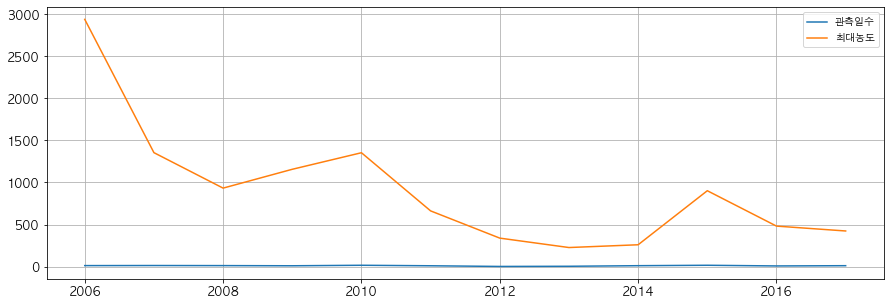

In [36]:
# y의 범위가 다를 경우 어떻게 하나? twinx(), twiny()

plt.figure(figsize = (15, 5))
plt.plot(df['년도'], df['관측일수'], label = '관측일수')
plt.plot(df['년도'], df['최대농도'], label = '최대농도')

plt.legend()
plt.grid()
plt.show()

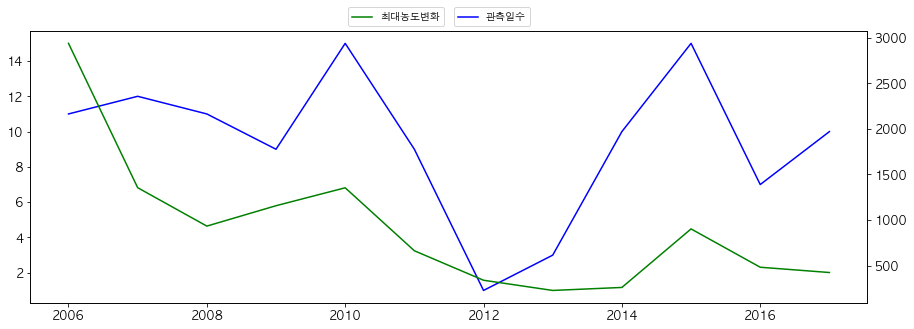

In [73]:
fig, ax1 = plt.subplots(figsize = (15,5)) # 행, 열의 개수를 생략 -> axes(subplot) 1개
ax2 = ax1.twinx()

ax1.plot(df['년도'], df['관측일수'], label = '관측일수', color = 'b')
ax2.plot(df['년도'], df['최대농도'], label = '최대농도변화', color = 'g')

# 방법1. loc으로 위치시켜보기
# ax1.legend(loc = 'upper left')
# ax2.legend(loc = 'upper right')
# plt.legend()

# 방법2. bbox로 위치시켜보기
ax1.legend(bbox_to_anchor = (0.5, 1), loc = 'lower left')
ax2.legend(bbox_to_anchor = (0.5, 1), loc = 'lower right')


plt.show()

- ax1, ax2 색이 동일하게 나온다. 구별이 안된다. color를 구분해주자. 
- 최대농도에 대한 레전드만 나온다. 왜? 겹치게 되는것. 따라서 레전드 위치를 따로 지정해줘야 한다. 

### 1.3.1 legend box 위치 지정
- loc : '수직방향위치 수평방향위치' 
    - axes box내에 legend box를 위치시킬 때 사용 
    - 수직방향위치 : lower, upper
    - 수평방향위치 : left, right
    - 정가운데 : center
    - 기본 : best
    
- bbox_to_anchor, loc 
    - axes box 밖에 legend box를 위치시킬 때 사용. 
    - bbox_to_anchor : 0-1 사이 실수 , legend box를 axes box 기준 어디에 둘 것인지를 지정한다. (x축위치, y축위치)
    - loc : legend box를 axes box의 어느부분을 기준으로 놓을 것인지

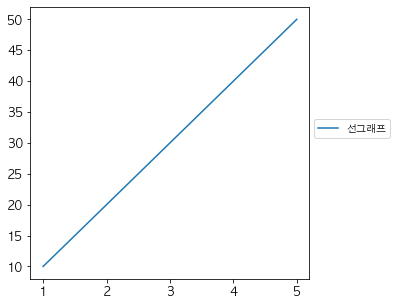

In [62]:
plt.figure(figsize = (5,5))
plt.plot([1, 2, 3, 4, 5],[10, 20, 30, 40, 50], label = '선그래프')

# plt.legend(loc = 'lower left')
# plt.legend(loc = 'center')

# plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
# plt.legend(bbox_to_anchor = (1,1), loc = 'lower left') # 레전드 박스를 기준으로 그래프앵커가 왼쪽 밑에
# plt.legend(bbox_to_anchor = (1,1), loc = 'upper right')
# plt.legend(bbox_to_anchor = (1,1), loc = 'lower right')
plt.legend(bbox_to_anchor = (1,0.5), loc = 'lower left') 

plt.show()

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x값, 2번인수 y값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
    - x,y 의 인수는 스칼라 실수나 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 원소의 수는 같아야 한다.

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/api/markers_api.html
- s
    - 마커의 크기
    - 리스트형태(리스트, 튜플)로 지정
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

## 2.3 산점도 활용

### 경보 발령횟수와 관측일수 간의 관계

# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량을 막대 형식으로 나타낸 그래프
- axes.bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- axes.barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비    

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)
- 2018년 계절별 강수량